## Hazırlayan: **Çağla YÜCE**

##Gerekli Kütüphanelerin Eklenmesi

In [1121]:
#Gerekli kütüphanelerin import edilmesi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Veri Setinin Eklenmesi ve İncelenmesi

In [1122]:
#Veri setinin yüklenmesi ve olası durumlara karşı kopyalanması
data = pd.read_csv("insurance.csv")
df = data.copy()

#Veri setinin görüntülenmesi
display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [1123]:
#Veri setinde yer alan sütunların özelliklerinin ve veri türlerinin görüntülenmesi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [1124]:
#Veri setinin sütun ve satır sayısının görüntülenmesi
df.shape

(1338, 7)

In [1125]:
#Veri setine ait veri türlerinin görüntülenmesi
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [1126]:
#Veri setinin ilk 5 satırının görüntülenmesi
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [1127]:
#Veri setinin son 5 satırının görüntülenmesi
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [1128]:
#Veri setindeki null değerlerin görüntülenmesi
df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [1129]:
#Veri setindeki sütunlara ait null değerleri sayısının görüntülenmesi
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [1130]:
#Veri setine ait istatistiksel bilgilerin görüntülenmesi
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [1131]:
#Veri setine ait numeric değerlerin korelasyonunun hesaplanması
drop_df = df.drop(columns=['sex', 'smoker', 'region'])
df_corr = drop_df.corr()
display(df_corr)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


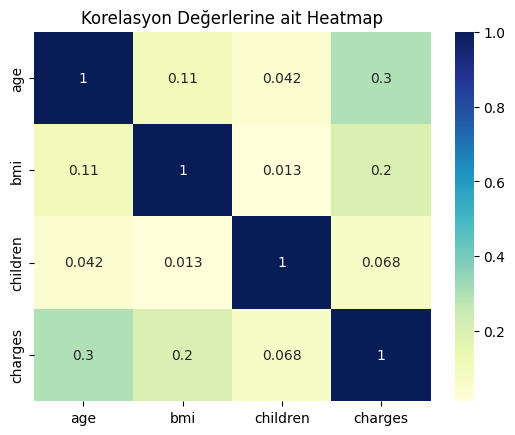

In [1132]:
#Korelasyon değerlerine ait heatmapin oluşturulması
sns.heatmap(df_corr, cmap="YlGnBu", annot=True).set(title="Korelasyon Değerlerine ait Heatmap");

##Exploratory Data Analysis

BMI değerlerinin dağılımının incelenmesi

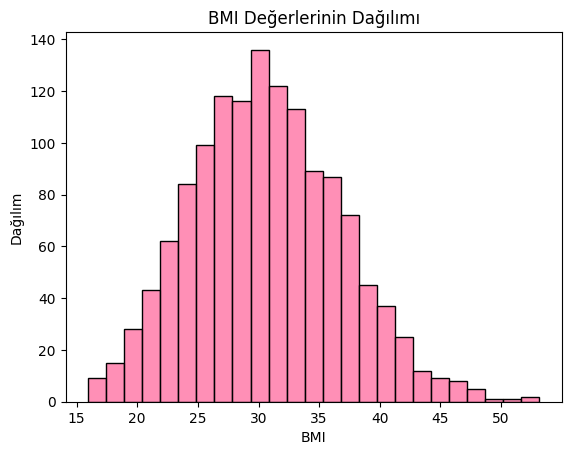

In [1133]:
#BMI değerlerinin gösterimi için histplot tercih edilmiştir
plt.figure()
sns.histplot(df["bmi"], color='#FF6A9E', edgecolor='black')
plt.title("BMI Değerlerinin Dağılımı")
plt.xlabel("BMI")
plt.ylabel("Dağılım")
plt.show()
#BMI değerlerine bakıldığında genel olarak fazla kilo ve obezite sorunu göze çarpmaktadır

Smoker ve Charges İlişkisinin İncelenmesi

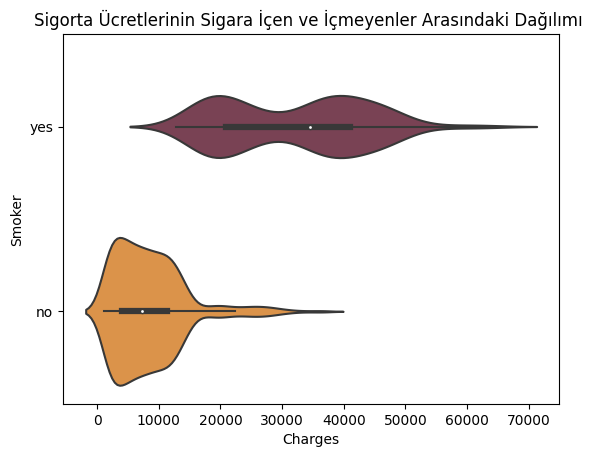

In [1134]:
#Smoker ve Charges ilişkisinin gösterimi için violinplot tercih edilmiştir
plt.figure()
color = ["#823951", "#F39332"]
sns.violinplot(data=df, x="charges", y="smoker", palette=color)
plt.title("Sigorta Ücretlerinin Sigara İçen ve İçmeyenler Arasındaki Dağılımı ")
plt.xlabel("Charges")
plt.ylabel("Smoker")
plt.show()
#Sigara içen insanların sağlık problemleri yaşama ihtimali daha yüksek olduğu için sigorta ücretlerinin de daha yüksek olduğu görülmektedir

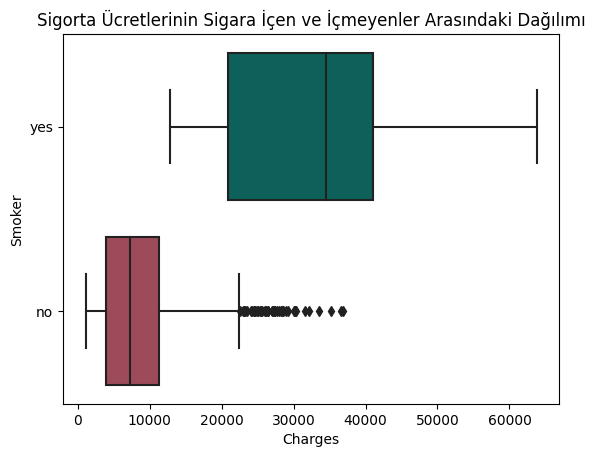

In [1135]:
#Smoker ve Charges ilişkisinin gösterimi için boxplot tercih edilmiştir
plt.figure()
color = ["#006F67", "#ab3d53"]
sns.boxplot(data=df, x="charges", y="smoker", palette=color)
plt.title("Sigorta Ücretlerinin Sigara İçen ve İçmeyenler Arasındaki Dağılımı")
plt.xlabel("Charges")
plt.ylabel("Smoker")
plt.show()
#Sigara içen insanların sağlık problemleri yaşama ihtimali daha yüksek olduğu için sigorta ücretlerinin de daha yüksek olduğu görülmektedir

Smoker ve Region İlişkisinin İncelenmesi

In [1136]:
#Smoker ve Region ilişkisinin elde edilmesi için veriler region labelına göre gruplandı
region_smoker = df.groupby(["region"])["smoker"].value_counts().unstack()
display(region_smoker)
#Sigara içme eğiliminin bölge sebebi ile çok fazla değişime uğramadığı gözlemlenmiştir

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


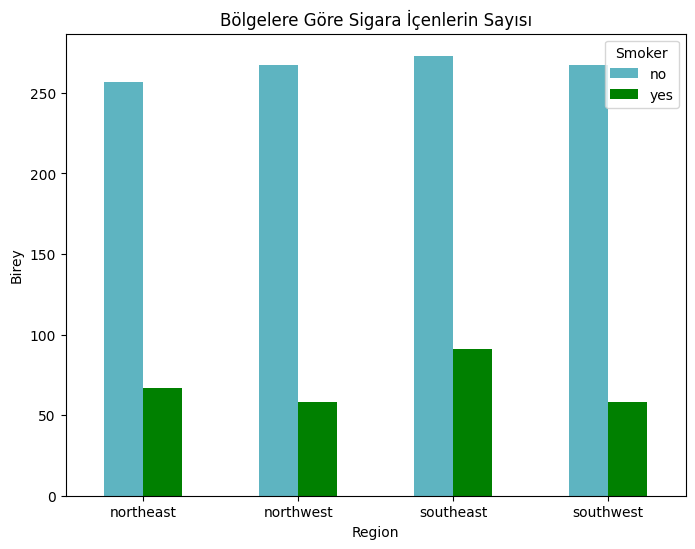

In [1137]:
#Smoker ve Region ilişkisinin gösterimi için barplot tercih edilmiştir
color = ["#5eb4c1","#008000"]
region_smoker.plot(kind="bar", figsize=(8,6), color=color)
plt.xlabel("Region")
plt.xticks(rotation = 0)
plt.ylabel("Birey")
plt.title("Bölgelere Göre Sigara İçenlerin Sayısı")
plt.legend(loc='upper right', title="Smoker")
plt.show()
#Sigara içme eğiliminin bölge sebebi ile çok fazla değişime uğramadığı gözlemlenmiştir

In [1138]:
#Smoker ve Region ilişkisinin elde edilmesi için veriler smoker labelına göre gruplandı
smoker_region = df.groupby(["smoker"])["region"].value_counts().unstack()
display(smoker_region)
#Sigara içme eğiliminin bölge sebebi ile çok fazla değişime uğramadığı gözlemlenmiştir

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


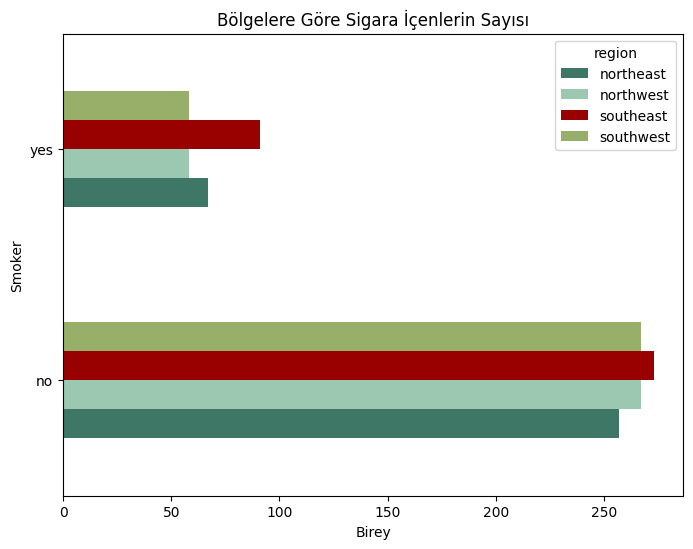

In [1139]:
#Smoker ve Region ilişkisinin gösterimi için horizontal barplot tercih edilmiştir
color=["#3F7766","#9cc7b1","#990000","#98af6a"]
smoker_region.plot(kind="barh", figsize=(8,6), color=color)
plt.xlabel("Birey")
plt.xticks(rotation = 0)
plt.ylabel("Smoker")
plt.title("Bölgelere Göre Sigara İçenlerin Sayısı")
plt.show()
#Sigara içme eğiliminin bölge sebebi ile çok fazla değişime uğramadığı gözlemlenmiştir

BMI ve Sex İlişkisinin İncelenmesi

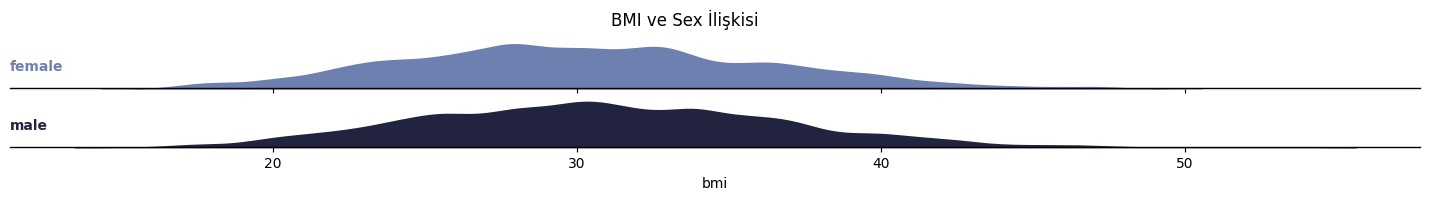

In [1140]:
#BMI ve Sex ilişkisinin gösterimi için kdeplot tercih edilmiştir
pal = sns.cubehelix_palette(2, rot=-.10, light=.5)
#kdeplotların üzerine yerleşmesi için bir FacetGrid oluşturuldu
kdeplot = sns.FacetGrid(df, row="sex", hue="sex", aspect=15, height=1, palette=pal)
#FacetGrid içerisinde kdeplotlar oluşturuldu
kdeplot.map(sns.kdeplot, "bmi",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
kdeplot.map(sns.kdeplot, "bmi", clip_on=False, color="w", lw=2, bw_adjust=.5)
#kdeplot altında yer alan çizgiler stilize edildi
kdeplot.refline(y=0, linewidth=1, linestyle="-", color="0", clip_on=False)
#sex labelına ait değerler FacetGrid üzerine yerleştirildi
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .45, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
kdeplot.map(label, "bmi")
#kdeplotların konumu ayarlandı
kdeplot.figure.subplots_adjust(hspace=0.2)
#kdeplot üzerindeki isimlendirmeler kaldırıldı ve başlık eklendi
kdeplot.set_titles("")
kdeplot.set(yticks=[], ylabel="")
kdeplot.despine(bottom=True, left=True)
kdeplot.fig.suptitle("BMI ve Sex İlişkisi");
#Erkek bireylere ait bmi değerlerinin daha yüksek olduğu görülmektedir, bunun sebebinin cinsiyetler arasındaki fiziksel farklar olduğu düşünülmüştür

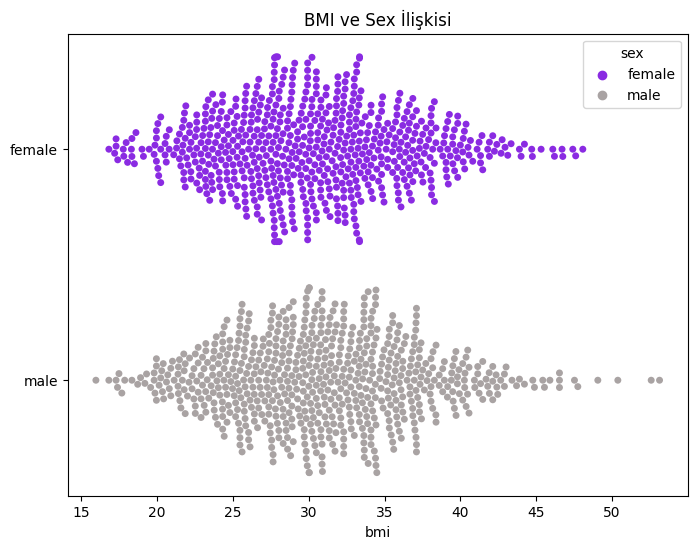

In [1141]:
#BMI ve Sex ilişkisinin gösterimi için swarmplot tercih edilmiştir
fig, ax = plt.subplots(figsize=(8, 6))
color=["#8A2BE2","#A9A3A3"]
ax = sns.swarmplot(data=df, x="bmi", y="sex", hue="sex", ax=ax, palette=color)
ax.set(ylabel="", title="BMI ve Sex İlişkisi");
#Erkek bireylere ait bmi değerlerinin daha yüksek olduğu görülmektedir, bunun sebebinin cinsiyetler arasındaki fiziksel farklar olduğu düşünülmüştür

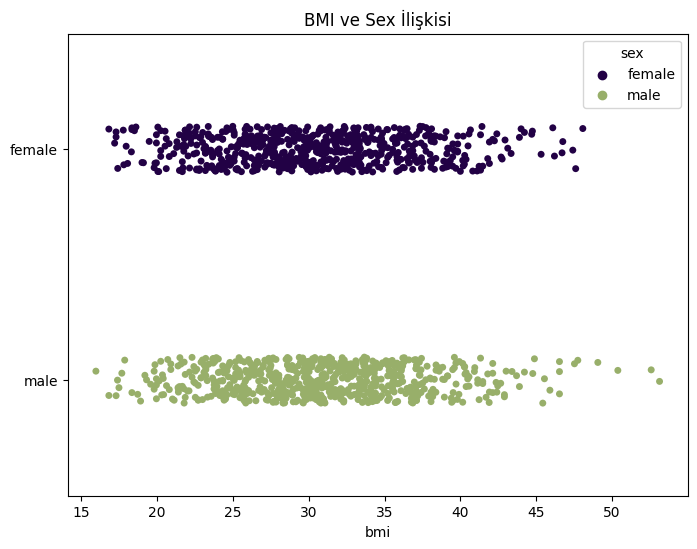

In [1142]:
#BMI ve Sex ilişkisinin gösterimi için stripplot tercih edilmiştir
color=["#220145","#98af6a"]
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.stripplot(data=df, x="bmi", y="sex", hue="sex", ax=ax, palette=color)
ax.set(ylabel="", title="BMI ve Sex İlişkisi");
#Erkek bireylere ait bmi değerlerinin daha yüksek olduğu görülmektedir, bunun sebebinin cinsiyetler arasındaki fiziksel farklar olduğu düşünülmüştür

Region ve Children İlişkisinin İncelenmesi

In [1143]:
#Region ve Children ilişkisinin elde edilmesi için veriler region labelına göre gruplandı
children_region = df.groupby(["region"])["children"].sum()
display(children_region)
#Çocuk sayısının dağılımının bölge sebebi ile çok fazla değişime uğramadığı gözlemlenmiştir

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

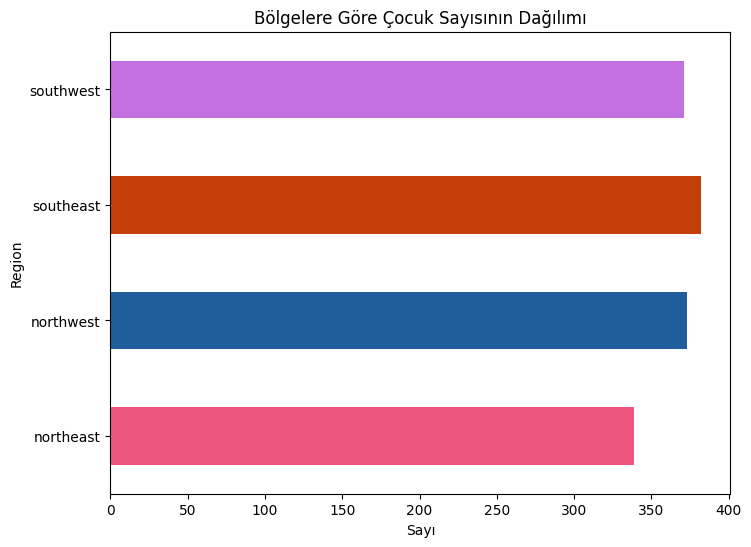

In [1144]:
#Region ve Children ilişkisinin gösterimi için horizontal barplot tercih edilmiştir
color = ["#EE577D","#205d9b","#c33e08","#C370E1"]
children_region.plot(kind="barh", figsize=(8,6), color=color)
plt.xlabel("Sayı")
plt.xticks(rotation = 0)
plt.ylabel("Region")
plt.title("Bölgelere Göre Çocuk Sayısının Dağılımı")
plt.show()
#Çocuk sayısının dağılımının bölge sebebi ile çok fazla değişime uğramadığı gözlemlenmiştir

In [1145]:
#Region ve Children ilişkisinde toplam çocuk sayısının elde edilmesi için veriler region labelına göre gruplandı
sum_children = df.groupby("region")["children"].sum()
display(sum_children);
#Çocuk sayısının dağılımının bölge sebebi ile çok fazla değişime uğramadığı gözlemlenmiştir

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

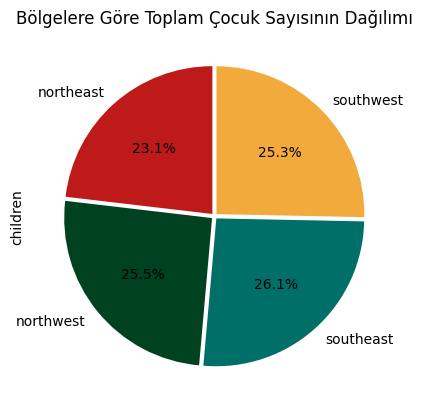

In [1146]:
#Region ve Children ilişkisinde toplam çocuk sayısının gösterimi için piechart tercih edilmiştir
palette_color = ["#BF1A1A","#004120","#006F67","#f2aa3d"]
explode = (0.02, 0.02, 0.02, 0.02)
sum_children.plot.pie(y='children',  colors=palette_color, autopct='%1.1f%%', title="Bölgelere Göre Toplam Çocuk Sayısının Dağılımı", startangle=90, explode=explode)
plt.show()
#Çocuk sayısının dağılımının bölge sebebi ile çok fazla değişime uğramadığı gözlemlenmiştir

In [1147]:
#Region ve Children ilişkisinde toplam çocuk sayısının en fazla olduğu bölge ve o bölgeye ait çocuk sayısının idxmax ve max ile gösterilmesi
max_region = sum_children.idxmax()
max_count = sum_children.max()
print(str(max_region) + ": " + str(max_count))
#En fazla çocuk sayısının 382 ile southeast bölgesinde olduğu görülmüştür

southeast: 382


Age ve BMI İlişkisinin İncelenmesi

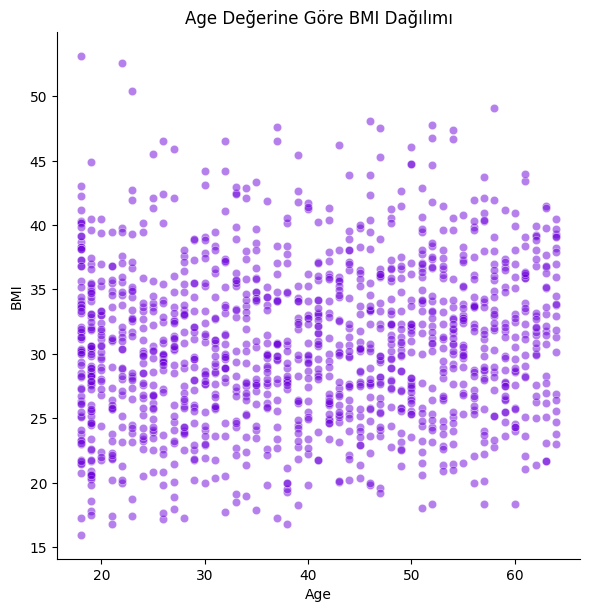

In [1148]:
#Age ve BMI ilişkisinin gösterimi için relplot tercih edilmiştir
snsplot = sns.relplot(x="age", y="bmi",sizes=(40, 400), alpha=.5, height=6, data=df, color="#6c00db")
snsplot.set_axis_labels("Age", "BMI")
plt.title("Age Değerine Göre BMI Dağılımı");
#Yaş ilerledikçe bmi değerinin arttığı gözlemlenmiştir, bu durum yavaşlayan metabolizma ile ilişkilendirilmiştir

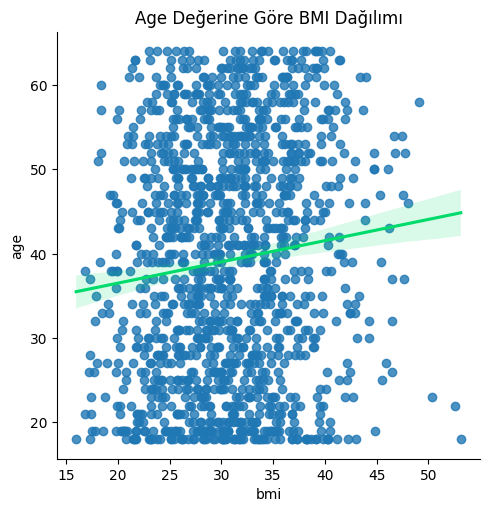

In [1149]:
#Age ve BMI ilişkisinin gösterimi için lmplot tercih edilmiştir
lmplot = sns.lmplot(data=df, x="bmi", y="age",height=5, line_kws={'color': '#00db6c'})
lmplot.set_axis_labels("bmi", "age")
plt.title("Age Değerine Göre BMI Dağılımı");
#Yaş ilerledikçe bmi değerinin arttığı gözlemlenmiştir, bu durum yavaşlayan metabolizma ile ilişkilendirilmiştir

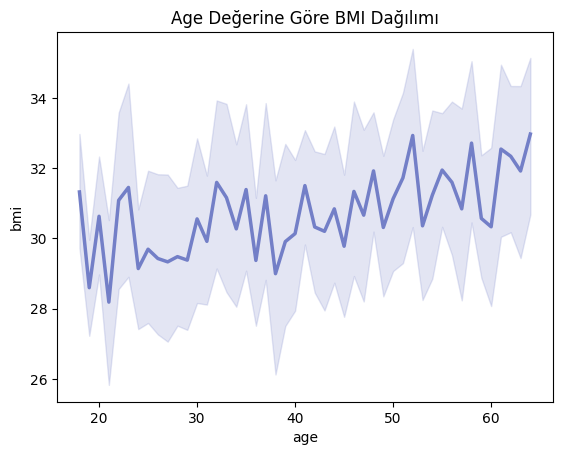

In [1150]:
#Age ve BMI ilişkisinin gösterimi için lineplot tercih edilmiştir
sns.lineplot(data=df, x="age", y="bmi", linewidth=2.5, color="#737FC7")
snsplot.set_axis_labels("age", "bmi")
plt.title("Age Değerine Göre BMI Dağılımı");
#Yaş ilerledikçe bmi değerinin arttığı gözlemlenmiştir, bu durum yavaşlayan metabolizma ile ilişkilendirilmiştir

BMI ve Children İlişkisinin İncelenmesi

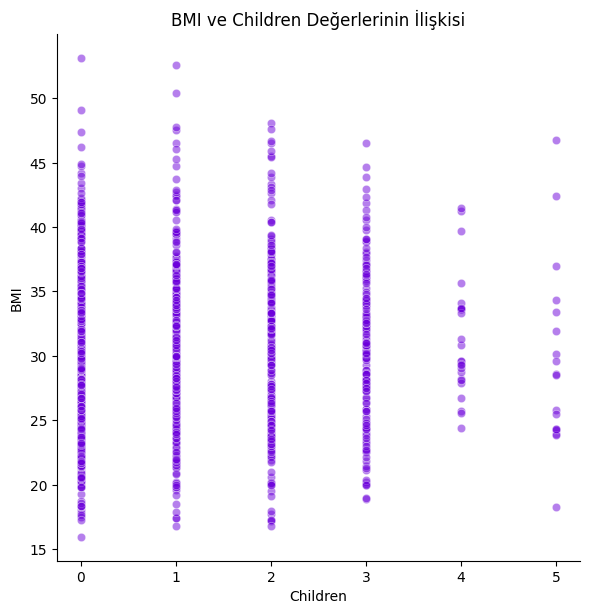

In [1151]:
#BMI ve Children ilişkisinin gösterimi için lineplot tercih edilmiştir
snsplot =  sns.relplot(x="children", y="bmi",sizes=(40, 400), alpha=.5, height=6, data=df, color="#6c00db")
snsplot.set_axis_labels("Children", "BMI")
plt.title("BMI ve Children Değerlerinin İlişkisi");
#Çok çocuklu insanların bmi ortalamasının daha düşük olduğu gözlemlenmiştir

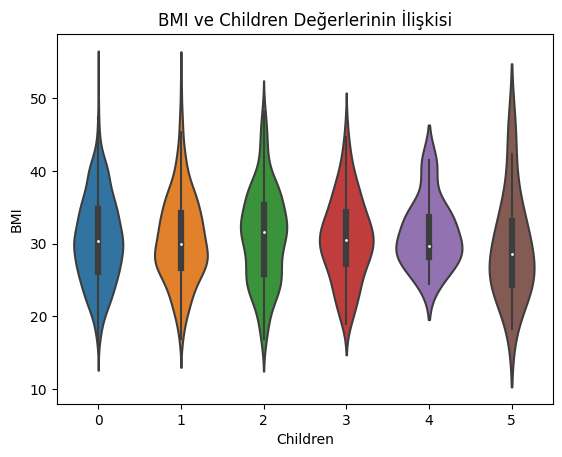

In [1152]:
#BMI ve Children ilişkisinin gösterimi için violinplot tercih edilmiştir
plt.figure()
sns.violinplot(data=df, x="children", y="bmi")
plt.title("BMI ve Children Değerlerinin İlişkisi")
plt.xlabel("Children")
plt.ylabel("BMI")
plt.show()
#Çok çocuklu insanların bmi ortalamasının daha düşük olduğu gözlemlenmiştir

BMI Değeri İçerisindeki Outlierlar

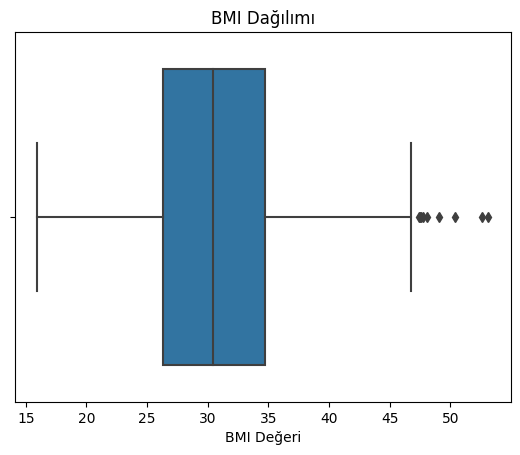

In [1153]:
#BMI içerisindeki outlierların bulunması için boxplot tercih edilmiştir
plt.figure()
sns.boxplot(data=df, x="bmi")
plt.title("BMI Dağılımı")
plt.xlabel("BMI Değeri")
plt.show()
#BMI değeri içerisinde outlier bulunmaktadır

BMI ve Charges İlişkisinin İncelenmesi

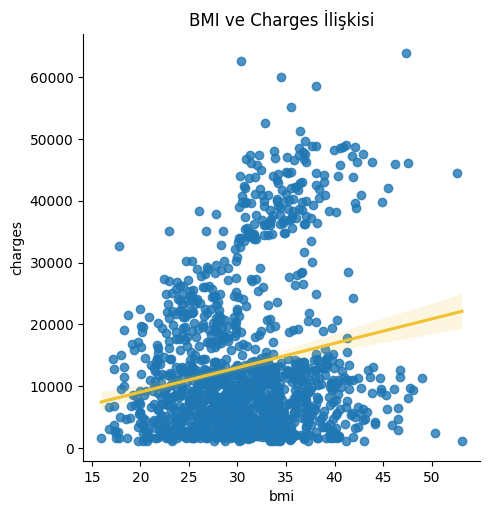

In [1154]:
#BMI ve Charges ilişkisinin gösterimi için lmplot tercih edilmiştir
lmplot = sns.lmplot(data=df, x="bmi", y="charges",height=5, line_kws={'color': '#F1C232'})
lmplot.set_axis_labels("bmi", "charges")
plt.title("BMI ve Charges İlişkisi");
#bmi değeri arttıkça ortalama charges değerinin arttığı gözlemlenmiştir

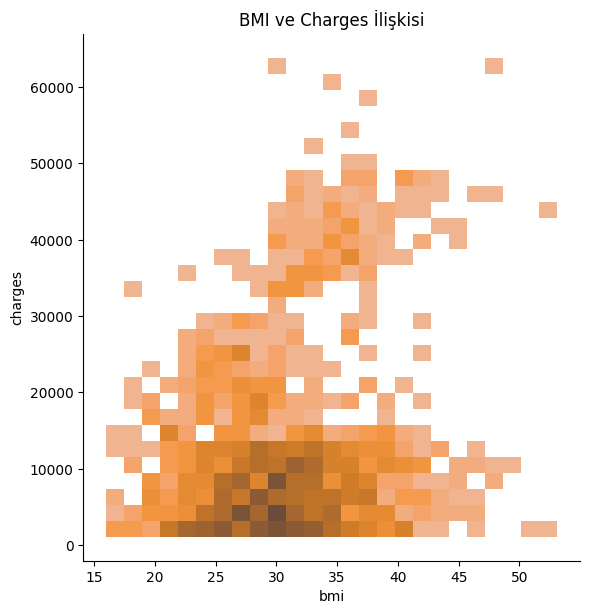

In [1155]:
#BMI ve Charges ilişkisinin gösterimi için displot tercih edilmiştir
sns.displot(data=df,x="bmi", y="charges",height=6, color="#F39332");
g.set_axis_labels("bmi", "charges")
plt.title("BMI ve Charges İlişkisi");
#bmi değeri arttıkça ortalama charges değerinin arttığı gözlemlenmiştir

Region, Smoker ve BMI Değerleri Arasındaki İlişkinin İncelenmesi

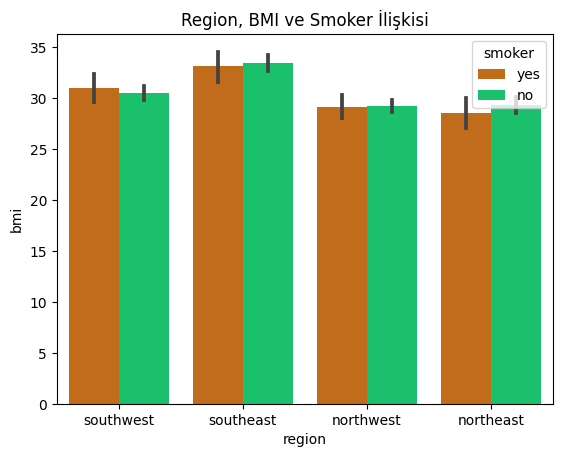

In [1156]:
#Eegion, Smoker ve BMI değerleri arasındaki ilişkinin incelenmesi için barplot tercih edilmiştir
color=["#db6c00","#00db6c"]
sns.barplot(data=df, x="region", y="bmi", hue="smoker", palette=color).set(title='Region, BMI ve Smoker İlişkisi')
plt.legend(loc='upper right', title="smoker");
#southeast bölgesinde ortalama bmi'nin daha yüksek olduğu görülmüştür
#sigara içmenin bmi değerini çok fazla etkilemediği görülmüştür

##Data Preprocessing

Modelimizi eğitmeden önce veri setimizde yer alan outlier değerler veri setinden çıkarıldı

In [1157]:
#Outlier değerleri elde edebilmek için kullanılan kütüphane import edildi
from scipy import stats

In [1158]:
#bmi sütununa ait outlier değerler bulundu
#outlier değerler veri setinden çıkarıldı
outlier_bmi = df[(np.abs(stats.zscore(df["bmi"])) > 3)]
mask = df.index.isin(outlier_bmi.index)
df = df[~mask]
display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [1159]:
#age sütununa ait outlier değerler bulundu
#outlier değerler veri setinden çıkarıldı
outlier_age = df[(np.abs(stats.zscore(df["age"])) > 3)]
mask = df.index.isin(outlier_age.index)
df = df[~mask]
display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [1160]:
#charges sütununa ait outlier değerler bulundu
#outlier değerler veri setinden çıkarıldı
outlier_charges = df[(np.abs(stats.zscore(df["charges"])) > 3)]
mask = df.index.isin(outlier_charges.index)
df = df[~mask]
display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


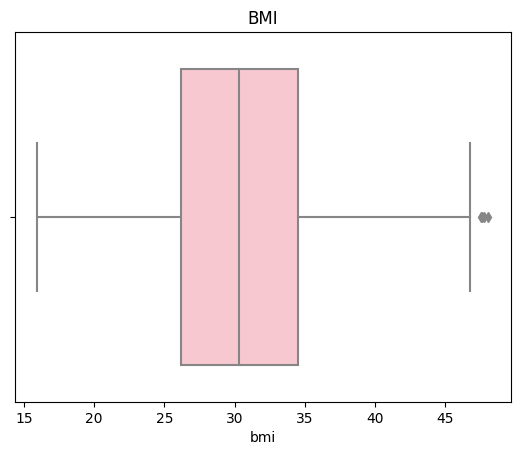

In [1161]:
#outlier değerler üzerinde yapılan işlem sonucunun görüntülenmesi için bmi sütununa ait veriler boxplot olarak gösterildi
plt.figure()
color = ["pink"]
sns.boxplot(data=df, x="bmi", palette=color)
plt.title("BMI")
plt.show()

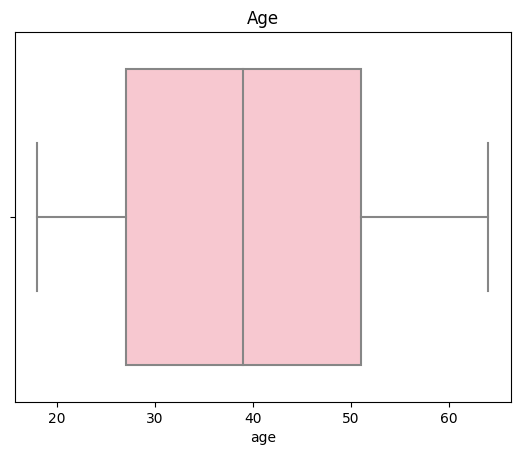

In [1162]:
#outlier değerler üzerinde yapılan işlem sonucunun görüntülenmesi için age sütununa ait veriler boxplot olarak gösterildi
plt.figure()
color = ["pink"]
sns.boxplot(data=df, x="age", palette=color)
plt.title("Age")
plt.show()

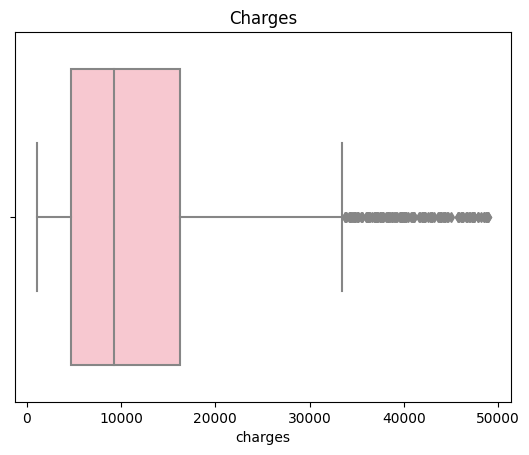

In [1163]:
#outlier değerler üzerinde yapılan işlem sonucunun görüntülenmesi için charges sütununa ait veriler boxplot olarak gösterildi
plt.figure()
color = ["pink"]
sns.boxplot(data=df, x="charges", palette=color)
plt.title("Charges")
plt.show()

Kategorik veriler üzerinde Label Encoding ve One-Hot Encoding işlemlerinin gerçekleştirilmesi




In [1164]:
#Label Encoding ve One-Hot Encoding işlemlerinin gerçekleştirilmesi için kullanılan kütüphane import edildi
from sklearn import preprocessing

In [1165]:
#sex ve smoker labelları için Label Encoding işlemi uygulandı
label_encoder = preprocessing.LabelEncoder()

#Eski label değerleri
print(df['sex'].unique())
print(df['smoker'].unique())

#Label Encoding işlemi
df[['sex', 'smoker']] = df[['sex','smoker']].apply(label_encoder.fit_transform)

#Yeni label değerleri
print(df['sex'].unique())
print(df['smoker'].unique())

['female' 'male']
['yes' 'no']
[0 1]
[1 0]


In [1166]:
#region labelı için One-Hot Encoding işlemi uygulandı
df = pd.get_dummies(df, columns = ['region'])
display(df)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


Veri setinin X_train,X_test, y_train, y_test olarak ayrılması

In [1167]:
#Veri setinin train ve test olarak ayrılması için kullanılan kütüphane import edildi
from sklearn.model_selection import train_test_split

In [1168]:
#Tahmin için kullanılan labellar X olarak seçildi
X = df.drop("charges", axis=1)
#Tahmin edilecek label y olarak seçildi
y = df['charges']
#Veri setinin train ve test olarak ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Veri setinin normalizasyon işleminin yapılması

In [1169]:
#Normalizasyon işlemini gerçekleştirmek için Min-Max Scaling tercih edildi
min_max_scaler = preprocessing.MinMaxScaler()
#X train ve X test min-max scaler ile normalize edildi
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [1170]:
#Normalize edilmiş X train ve X test değerleri veri setine dönüştürüldü
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

##Model Selection

Model selection işlemi için farklı regression modelleri test edildi

In [1171]:
#Regresyon modellerinin test edilmesi için kullanılan kütüphaneler import edildi
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso

**Linear Regression**

In [1172]:
#Linear Regression
linear_reg = LinearRegression()
#Linear Regression accuracy score
cv_results = cross_validate(linear_reg, X_train_scaled_df, y_train, cv=10, return_estimator=True)
print("Accuracy Score: " + str(cv_results['test_score'].mean()))
#Linear Regression rms score
cv_results_rms = cross_validate(linear_reg, X_train_scaled_df, y_train, scoring="neg_mean_squared_error", cv=10, return_estimator=True)
cv_results_rms = np.sqrt(-(cv_results_rms['test_score'].mean()))
print("RMS Score: " + str(cv_results_rms))

Accuracy Score: 0.7381189963602286
RMS Score: 5826.938922588918


**Decision Tree Regression**

In [1173]:
#Decision Tree Regression
decision_tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
#Decision Tree Regression accuracy score
cv_results = cross_validate(decision_tree_reg, X_train_scaled_df, y_train, cv=10, return_estimator=True)
print("Accuracy Score: " + str(cv_results['test_score'].mean()))
#Decision Tree Regression rms score
cv_results_rms = cross_validate(decision_tree_reg, X_train_scaled_df, y_train, scoring="neg_mean_squared_error", cv=10, return_estimator=True)
cv_results_rms = np.sqrt(-(cv_results_rms['test_score'].mean()))
print("RMS Score: " + str(cv_results_rms))

Accuracy Score: 0.835134114759225
RMS Score: 4606.422085792266


**Random Forest Regression**
(Best Performing Model)

In [1174]:
#Random Forest Regression
random_forest_reg = RandomForestRegressor(random_state=42)
#Random Forest Regression accuracy score
cv_results = cross_validate(random_forest_reg, X_train_scaled_df, y_train, cv=10, return_estimator=True)
print("Accuracy Score: " + str(cv_results['test_score'].mean()))
#Random Forest Regression rms score
cv_results_rms = cross_validate(random_forest_reg, X_train_scaled_df, y_train, scoring="neg_mean_squared_error", cv=10, return_estimator=True)
cv_results_rms = np.sqrt(-(cv_results_rms['test_score'].mean()))
print("RMS Score: " + str(cv_results_rms))

Accuracy Score: 0.8371594494436904
RMS Score: 4574.311049495358


**K Nearest Neighbors Regression**

In [1175]:
#K Nearest Neighbors Regression
knn_reg = KNeighborsRegressor(n_neighbors=3)
#K Nearest Neighbors Regression accuracy score
cv_results = cross_validate(knn_reg, X_train_scaled_df, y_train, cv=10, return_estimator=True)
print("Accuracy Score: " + str(cv_results['test_score'].mean()))
#K Nearest Neighbors Regression rms score
cv_results_rms = cross_validate(knn_reg, X_train_scaled_df, y_train, scoring="neg_mean_squared_error", cv=10, return_estimator=True)
cv_results_rms = np.sqrt(-(cv_results_rms['test_score'].mean()))
print("RMS Score: " + str(cv_results_rms))

Accuracy Score: 0.7409403092206167
RMS Score: 5795.765251890239


**Support Vector Regression**

In [1176]:
#Support Vector Regression
SVR_reg = SVR(kernel='rbf')
#Support Vector Regression accuracy score
cv_results = cross_validate(SVR_reg, X_train_scaled_df, y_train, cv=10, return_estimator=True)
print("Accuracy Score: " + str(cv_results['test_score'].mean()))
#Support Vector Regression rms score
cv_results_rms = cross_validate(SVR_reg, X_train_scaled_df, y_train, scoring="neg_mean_squared_error", cv=10, return_estimator=True)
cv_results_rms = np.sqrt(-(cv_results_rms['test_score'].mean()))
print("RMS Score: " + str(cv_results_rms))

Accuracy Score: -0.11154827600423652
RMS Score: 12189.446018488941


**Ridge Regression**

In [1177]:
#Ridge Regression
Ridge_reg = Ridge()
#Ridge Regression accuracy score
cv_results = cross_validate(Ridge_reg, X_train_scaled_df, y_train, cv=10, return_estimator=True)
print("Accuracy Score: " + str(cv_results['test_score'].mean()))
#Ridge Regression rms score
cv_results_rms = cross_validate(Ridge_reg, X_train_scaled_df, y_train, scoring="neg_mean_squared_error", cv=10, return_estimator=True)
cv_results_rms = np.sqrt(-(cv_results_rms['test_score'].mean()))
print("RMS Score: " + str(cv_results_rms))

Accuracy Score: 0.7387347448642936
RMS Score: 5822.835922119284


**Lasso Regression**

In [1178]:
#Lasso Regression
Lasso_reg = Lasso()
#Lasso Regression accuracy score
cv_results = cross_validate(Lasso_reg, X_train_scaled_df, y_train, cv=10, return_estimator=True)
print("Accuracy Score: " + str(cv_results['test_score'].mean()))
#Lasso Regression rms score
cv_results_rms = cross_validate(Lasso_reg, X_train_scaled_df, y_train, scoring="neg_mean_squared_error", cv=10, return_estimator=True)
cv_results_rms = np.sqrt(-(cv_results_rms['test_score'].mean()))
print("RMS Score: " + str(cv_results_rms))

Accuracy Score: 0.7387051901453335
RMS Score: 5822.5642084744695


##Hyper-Parameter Optimization

Random Forest Regression Modeli için en iyi performans gösteren argümanların tespit edilmesi

In [1179]:
#Test edilecek argümanlar
forest_params = param_grid = { "n_estimators" : [10,20,30],
                               "max_features" : ["sqrt", "log2"],
                               "min_samples_split" : [2,4,8],
                               "bootstrap": [True, False],
                               }
#Grid Search ile argümanların test edilmesi
grid_search_random_forest = GridSearchCV(random_forest_reg, forest_params, cv = 10, scoring='neg_mean_squared_error', refit=True)
#Random Forest Regression Modelinin eğitilmesi
grid_search_random_forest.fit(X_train_scaled_df, y_train)
#En iyi performans gösteren argüman listesi
print(grid_search_random_forest.best_params_)
#En iyi performans skoru
print(grid_search_random_forest.best_score_)

{'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 30}
-21338640.200258706


##Model Evaluation

Oluşturulan optimal modelin elde ettiği skorların hesaplanması

In [1180]:
#Skorların hesaplanması için kullanılan kütüphaneler import edildi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [1181]:
#En iyi performans gösteren model alındı ve tahmin işlemi gerçekleştirildi
optimized_model = grid_search_random_forest.best_estimator_
y_predicted_optimized_random_forest = optimized_model.predict(X_test_scaled_df)

In [1182]:
#mse, mae ve r2 scoreları hesaplandı
mean_squared_error_optimized = mean_squared_error(y_test, y_predicted_optimized_random_forest)
mean_absolute_error_optimized = mean_absolute_error(y_test, y_predicted_optimized_random_forest)
r2_score_optimized = r2_score(y_test, y_predicted_optimized_random_forest)

print("Mean absolute error: " + str(mean_squared_error_optimized))
print("Mean square error: " + str(mean_absolute_error_optimized))
print("F2 score: " + str(r2_score_optimized))

Mean absolute error: 24041043.233302165
Mean square error: 2781.603464589886
F2 score: 0.8239073210735568
